---

<div align="center">
    
## Image Processing  
#### (ENIN 880CA – fall 2021) 
### Assignment 1 
### Instructor: Mehran Mehrandezh 
#### Elyar Zavvari
    
</div>

---



Students should read chapters 12 and 13 of the book: Robotics, Vision, and Control by Peter Corke (1 st Edition).  
Students should also watch the following videos on MasterClasses under “computer vision” in QUT Robot Academy: Image Processing (10 lessons), Spatial Operators (11 lessons), and Feature Extraction (9 lessons).  
Students are allowed to use the following toolboxes/software libraries for doing exercise #1:

* __Machine Vision Toolbox__ in Matlab by Peter Corke
* __Image Processing Toolbox__ in Matlab by Mathworks
* __Computer Vision Toolbox__ in Matlab by Mathworks
* __OpenCV__
---

1- __Basics:__ Write a program that grabs a frame from your own camera and displays it. Add the following effects to the image: (1) negative image, (2) thresholding, (3) edge
filtering.

<span style="color:DarkCyan">
    
The codes are executed in opencv toolbox. Since there is no camera attached to this system we have imported a downloaded picture to our path named **image01.jpg**.  
    Image negative is produced by subtracting each pixel from the maximum intensity value. For example for an 8-bit image, the max intensity value is $ 2^8– 1 = 255 $, thus each pixel is subtracted from $255$ to produce the output image.  
    Thus, the transformation function used in image negative is  
    
\begin{equation}
    s=L-1-r
\end{equation}

Where $L-1$ is the max intensity value and $s$, and $r$ are the output and input pixel values respectively.

</span>

uint8


Text(0.5, 1.0, 'Negative Picture')

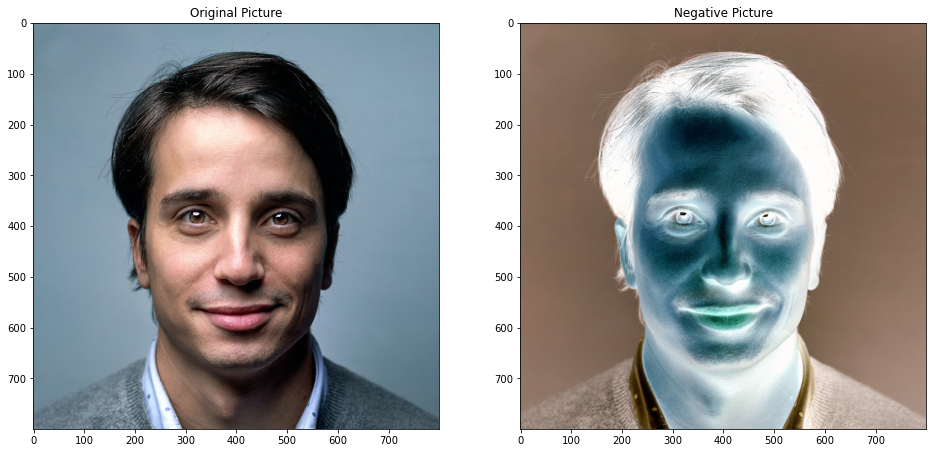

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("img.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Check the datatype of the image
print(image.dtype)

# Subtract the img from max value(calculated from dtype)
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_neg = 255 - img

# Show the image 
f = plt.figure(figsize = (16,16))

f.add_subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Picture")

f.add_subplot(1,2,2)
plt.imshow(img_neg, cmap="gray", vmin=0, vmax=255)
plt.title("Negative Picture")

<span style="color:DarkCyan">
    
In the following code we are going to convert the previous picture to a grayscale one:

</span>

Text(0.5, 1.0, 'Grayscale Picture')

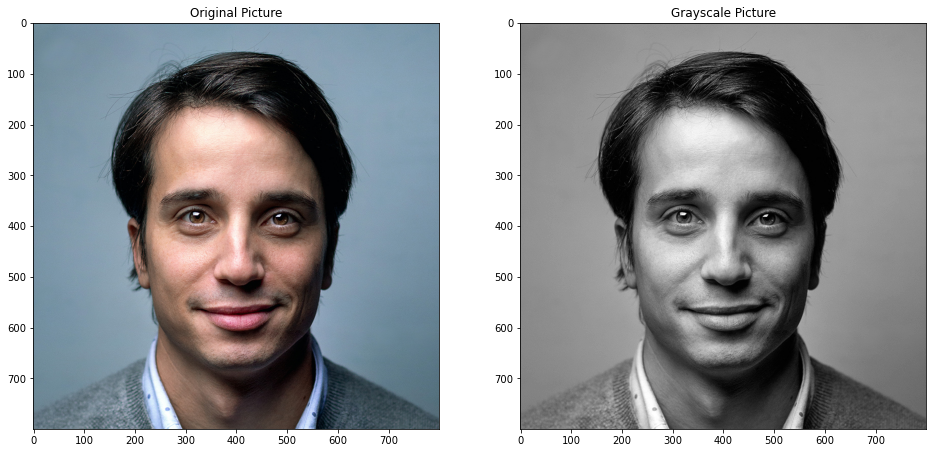

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("img.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show the image 
f = plt.figure(figsize = (16,16))

f.add_subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Picture")

f.add_subplot(1,2,2)
plt.imshow(img_gray, cmap="gray", vmin=0, vmax=255)
plt.title("Grayscale Picture")

<span style="color:DarkCyan">
    
In thresholding, each pixel value is compared with the threshold value. If the pixel value is smaller than the threshold, it is set to 0, otherwise, it is set to a maximum value (generally 255). There are several ways of thresholding and we applied binary thresholding to the image. Binary thresholding can be obtained by the following formula:  
    
\begin{equation}
dst(x,y) =
  \begin{cases}
    maxval       & if srx(x,y)>tresh\\
    0  & otherwise
  \end{cases}
\end{equation}

    
</span>

Text(0.5, 1.0, 'Threshold Picture')

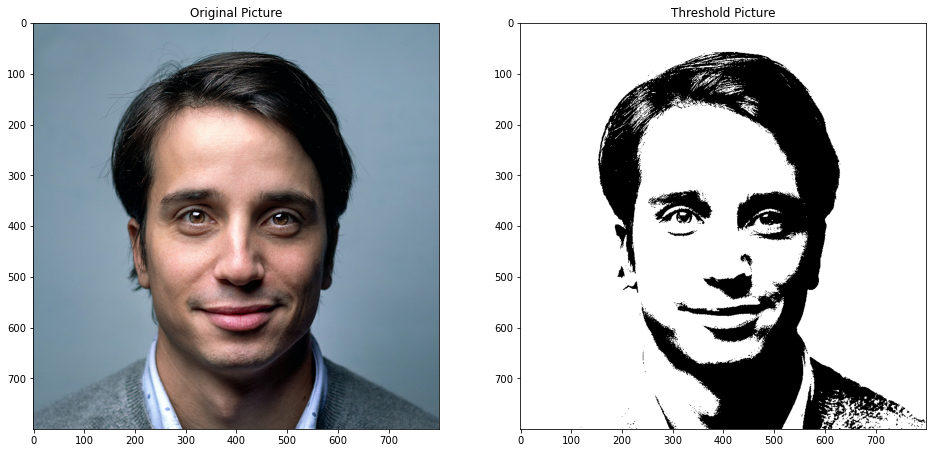

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("img.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# applying the binary thresholding technique on the input image
# all pixels value above 120 will be set to 255
ret, img_thresh = cv2.threshold(img_gray, 75, 256, cv2.THRESH_BINARY)

# Show the image 
f = plt.figure(figsize = (16,16))

f.add_subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Picture")

f.add_subplot(1,2,2)
plt.imshow(img_thresh,  cmap="gray", vmin=0, vmax=255)
plt.title("Threshold Picture")

Text(0.5, 1.0, 'Edges of Picture')

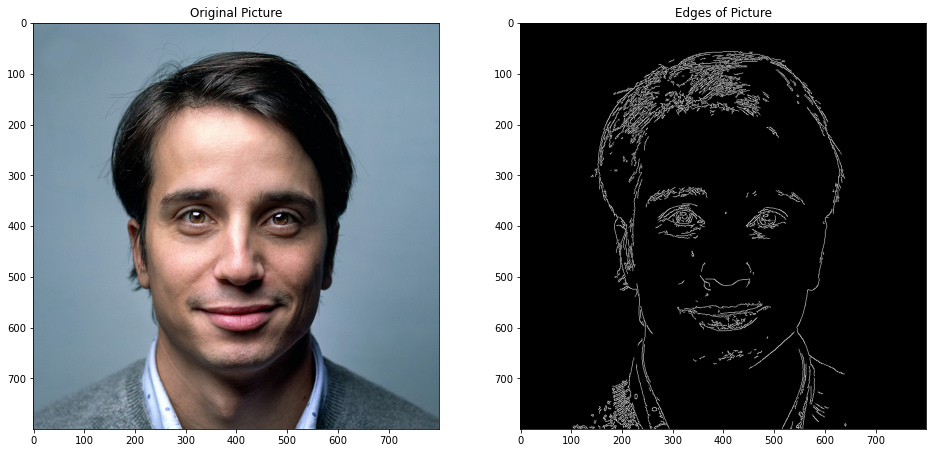

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("img.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# applying the edge detection technique on the input image
img_edges = cv2.Canny(img,130,256)

# Show the image 
f = plt.figure(figsize = (16,16))

f.add_subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Picture")

f.add_subplot(1,2,2)
plt.imshow(img_edges,  cmap="gray", vmin=0, vmax=255)
plt.title("Edges of Picture")

---
---

2- __Convolution:__ Grab a frame of your own photo, and apply smoothing by: (1) using a 21 x 21 uniform kernel and a Gaussian kernel. Can you observe the ringing artefact in the former?

Text(0.5, 1.0, 'Blurred Picture with uniform kernel')

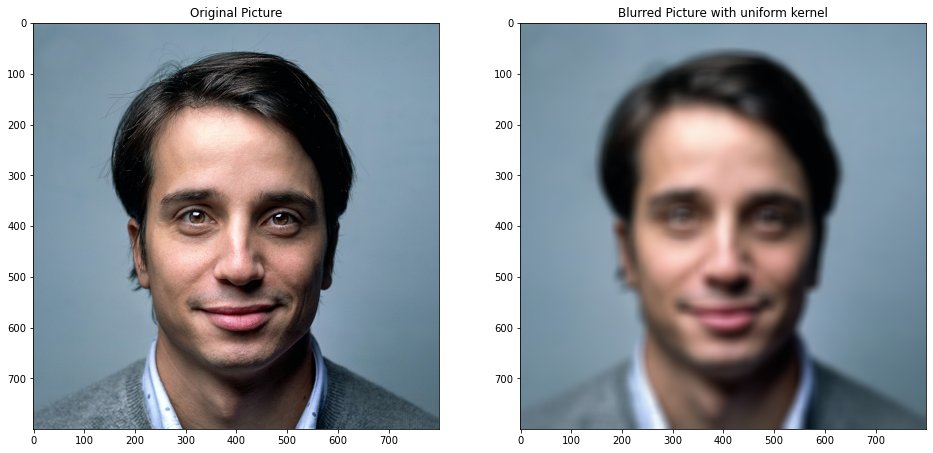

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("img.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#creating kernel matrix
kernel = np.ones((21, 21), np.float32) / (21**2)

#Convoluting the image withh kernel
img_uniform = cv2.filter2D(image, -1, kernel)

# Show the image 
f = plt.figure(figsize = (16,16))

f.add_subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Picture")

f.add_subplot(1,2,2)
plt.imshow(cv2.cvtColor(img_uniform, cv2.COLOR_BGR2RGB))
plt.title("Blurred Picture with uniform kernel")

Text(0.5, 1.0, 'Gaussian Blurred Picture')

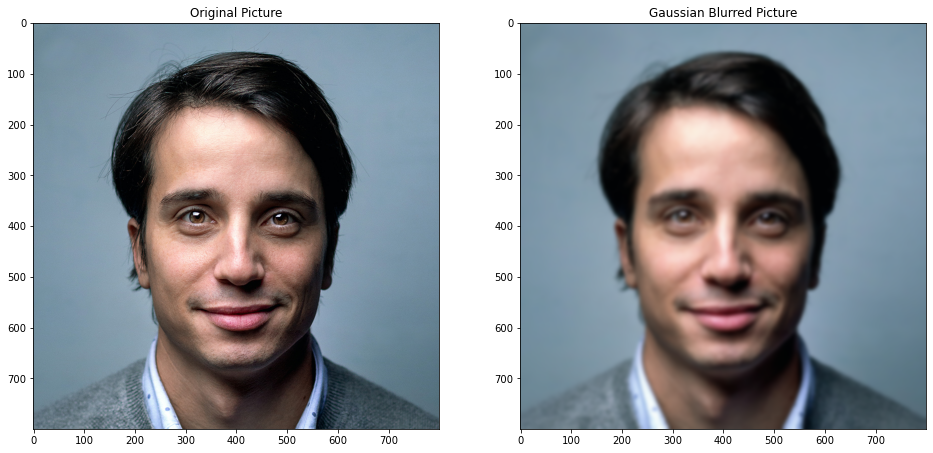

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("img.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#applying Gaussian blur on image
img_gaussian = g = cv2.GaussianBlur(image, (21,21), 0)

# Show the image 
f = plt.figure(figsize = (16,16))

f.add_subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Picture")

f.add_subplot(1,2,2)
plt.imshow(cv2.cvtColor(img_gaussian, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blurred Picture")

---
---

3- __Template Matching:__ Select your left eye in a photo of you as a template (the template should have odd dimensions). Find the best match and where does it occur? What is the similarity to your other eye?

Text(0.5, 1.0, 'Gaussian Blurred Picture')

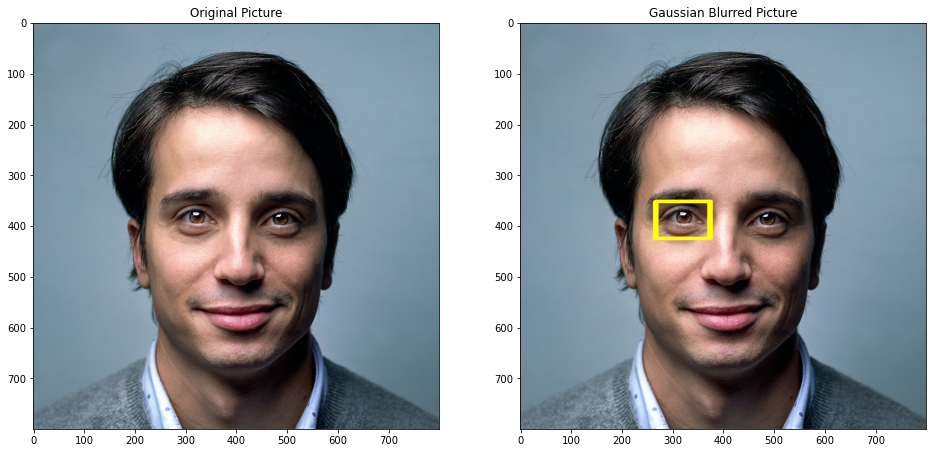

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the main image
img_rgb = cv2.imread("img.jpg")
img = cv2.imread("img.jpg")
 
# Convert it to grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
 
# Read the template
template = cv2.imread('template.jpg',0)
 
# Store width and height of template in w and h
w, h = template.shape[::-1]
 
# Perform match operations.
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
 
# Specify a threshold
threshold = 0.8
 
# Store the coordinates of matched area in a numpy array
loc = np.where( res >= threshold)
 
# Draw a rectangle around the matched region.
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

# Show the final image with the matched area.
# Show the image 
f = plt.figure(figsize = (16,16))

f.add_subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Picture")

f.add_subplot(1,2,2)
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blurred Picture")


---
---
4- __Blobs:__ Create an image of an object with several holes in it (you could draw it on a piece
of paper and take a picture, export it from a drawing program). Determine the outer,
inner and total boundaries of the object.

Text(0.5, 1.0, 'Edges of Picture')

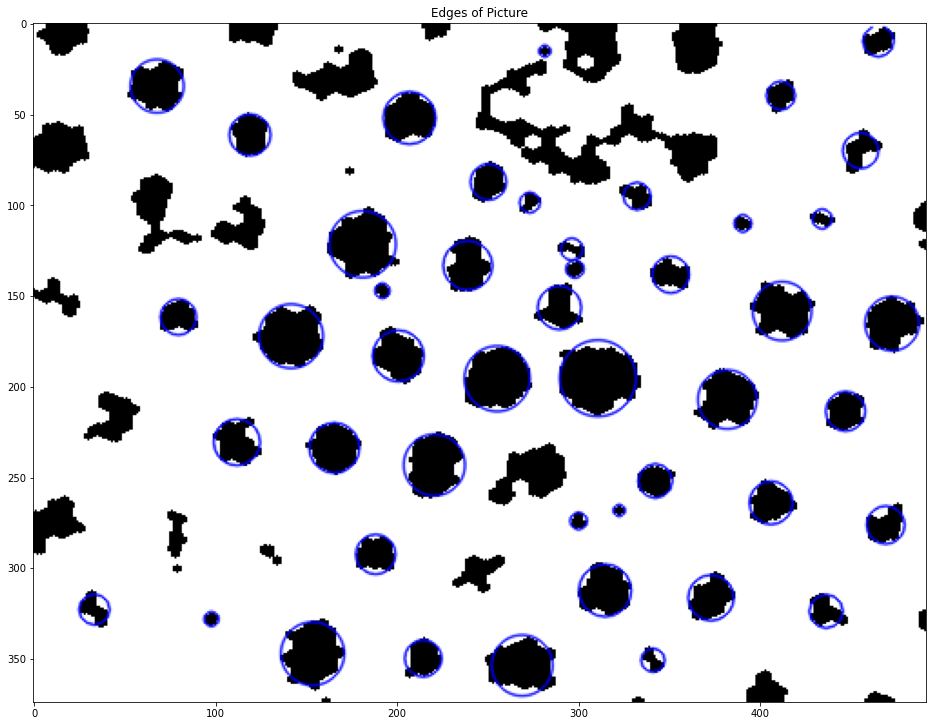

In [ ]:
import cv2
import numpy as np;

# Read image
img = cv2.imread("blob.png", cv2.IMREAD_GRAYSCALE)

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.0

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.5

# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs.
keypoints = detector.detect(img)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
img_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

f = plt.figure(figsize = (16,16))
plt.imshow(img_with_keypoints,  cmap="gray", vmin=0, vmax=255)
plt.title("Edges of Picture")

---
---

5- __Hough Transform:__ Apply the Hough Transform to one of your own images.

Text(0.5, 1.0, 'Edges of Picture')

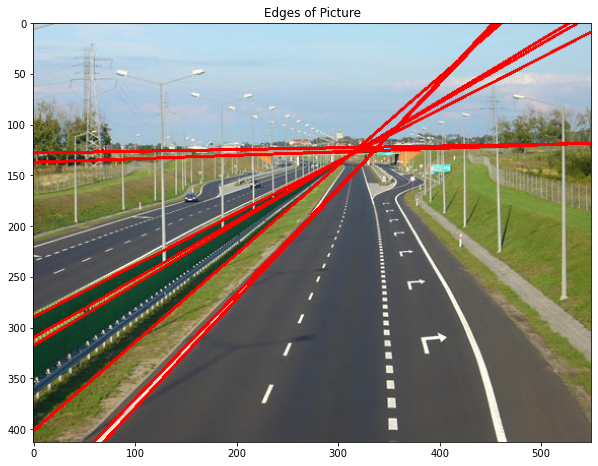

In [ ]:
import cv2
import numpy as np;
import matplotlib.pyplot as plt


# Read image
img = cv2.imread("highway.jpg")

# Convert the image to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the edges in the image using canny detector
edges = cv2.Canny(gray, 50, 200)

# Detect points that form a line
#lines = cv2.HoughLinesP(edges, 1, np.pi/180, max_slider=50, minLineLength=10, maxLineGap=250)

# Draw lines on the image
#for line in lines:
#    x1, y1, x2, y2 = line[0]
#    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
    
minLineLength = 10
maxLineGap = 50
#lines = cv2.HoughLinesP(edges, 1, np.pi/150, 200,        minLineLength,maxLineGap)
#lines = cv2.HoughLinesP(edges, 1, np.pi/180, 20, minLineLength=5, maxLineGap=100)
lines = cv2.HoughLines(edges,1,np.pi/180,230)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

# Show result
f = plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Edges of Picture")


---
---
6- __Corner Detection:__ Take a picture of your desk and apply Harris, Nobel, and Shi-Tomas corner detectors on that and compare the results.

Text(0.5, 1.0, 'Corners detected with Harris Algorithm')

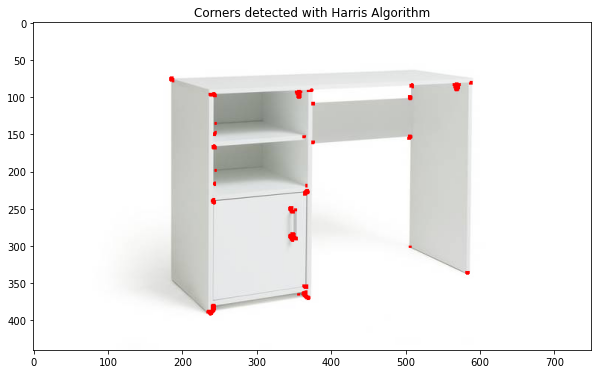

In [68]:
# Python programe to illustrate
# corner detection with
# Harris Corner Detection Method

# organizing imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
  
 
  
# loading image
image = cv2.imread('desk.jpg') 
  
# convert the input image into grayscale
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  
# convert the data type 
img_gray = np.float32(img_gray) 
  
# implementing cv2.cornerHarris method 
hcd_img = cv2.cornerHarris(img_gray, 5, 5, 0.08) 
  
# marking dilated corners 
hcd_img = cv2.dilate(hcd_img, None) 
  
# reverting back to the original image
image[hcd_img > 0.01 * hcd_img.max()]=[0, 0, 255] 

#Show result
f = plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Corners detected with Harris Algorithm")

Text(0.5, 1.0, 'Corners detected with Shi-Tomashi Algorithm')

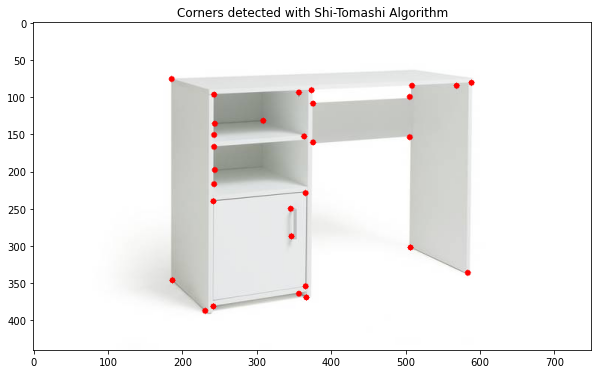

In [83]:
# Python programe to illustrate
# corner detection with
# Shi-Tomashi Corner Detection Method

# organizing imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
  
# loading image
image = cv2.imread('desk.jpg') 
  
# convert the input image into grayscale
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  
# convert the data type 
img_gray = np.float32(img_gray) 

corners = cv2.goodFeaturesToTrack(img_gray, 100, 0.02, 10)
corners = np.int0(corners)

for corner in corners:
    x, y = corner.ravel()
    cv2.circle(image, (x,y), 4, (0,0,255), -1)


#Show result
f = plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Corners detected with Shi-Tomashi Algorithm")